In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dfx=pd.read_csv("xdata.csv")
dfy=pd.read_csv("ydata.csv")

In [26]:
x=dfx.values
x=x[:,1:]
x.shape

(399, 2)

In [28]:
y=dfy.values
y=y[:,1:].reshape((-1,))
y.shape

(399,)

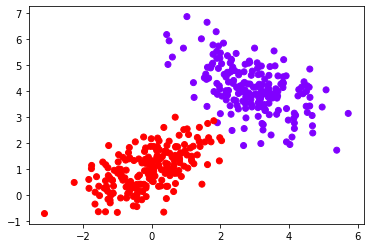

In [30]:
plt.scatter(x[:,0],x[:,1],c=y,cmap='rainbow')

In [96]:
query_pt1=np.array([0,2])
query_pt2=np.array([4,6])

In [ ]:
plt.scatter(x[:,0],x[:,1],c=y)

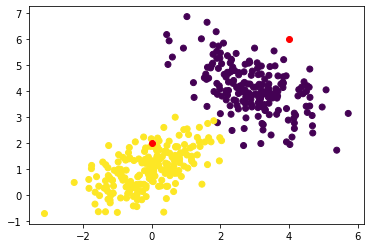

In [97]:
plt.scatter(query_pt1[0],query_pt1[1],color='red')
plt.scatter(query_pt2[0],query_pt2[1],color='red')
plt.show()

# KNN Algorithm

In [47]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

In [81]:
def knn(x,y,query_pt,k=5):
    n=x.shape[0]
    vals=[]
    
    #find dist of each row and store in the form of tuple
    for i in range(0,n):
        d=dist(query_pt,x[i])
        vals.append((d,y[i]))
    
    #array of tuples sorts on the basis of 1st parameter (here d)
    vals=sorted(vals)
    vals=vals[:k]
    vals=np.array(vals)
    
    #get value 0f y(2nd column) and find max occurence
    new_vals=np.unique(vals[:,1],return_counts=True)
    print(new_vals)
    
    #get the ele which has max occurence
    index=new_vals[1].argmax()
    pred=new_vals[0][index]
    
    return pred

In [76]:
#unique example
arr=[1,4,5,5,1,1]
arr=np.unique(arr,return_counts=True)
print(arr[0])
print(arr[1])

[1 4 5]
[3 1 2]


In [103]:
prediction=knn(x,y,query_pt1)
prediction

(array([1.]), array([5], dtype=int64))


1.0

In [102]:
prediction=knn(x,y,query_pt2)
prediction

(array([0.]), array([5], dtype=int64))


0.0

In [91]:
prediction=knn(x,y,[-2,0])
prediction

(array([1.]), array([5], dtype=int64))


1.0